In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

In [72]:
column_names = ["Size (sqft)", "Number of Bedrooms", "Number of Floors", "Age of Home", "Price (1000s dollars)"]
df = pd.read_csv("house.csv", names=column_names)

X_train = df.drop(columns="Price (1000s dollars)")
Y_train = df[["Price (1000s dollars)"]]

In [73]:
X_train.head()

,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0


In [74]:
# scaling the features
x_mu = np.mean(X_train, axis=0)
x_sigma = np.std(X_train, axis=0)
x_norm = (X_train - x_mu) / x_sigma

x_norm.head()

,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home
0,-1.120185,-1.087939,-0.782881,1.021911
1,-0.411745,0.444369,-0.782881,0.983129
2,1.293850,0.444369,1.277333,-0.839635
3,0.755241,0.444369,1.277333,0.129920
4,1.322964,0.444369,1.277333,-0.917199


In [75]:
def compute_cost(x, y, w_now, b_now):
    x = x.values
    y = y.values

    m = x.shape[0]
    w_now = np.array(w_now)

    j_wb = 0

    for i in range(m):
        f_wb_i = np.dot(w_now, x[i]) + b_now
        j_wb += (f_wb_i - y[i]) ** 2

    j_wb /= (2 * m)

    return j_wb

In [76]:
def gradient_descent(x, y, w_now, b_now, alpha):
    x = x.values
    y = y.values
    
    m, n = x.shape

    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(w_now, x[i]) + b_now
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += f_wb - y[i]
    
    dj_dw /= m
    dj_db /= m

    w = w_now - alpha * dj_dw        
    b = b_now - alpha * dj_db  

    return w, b

In [77]:
b = 0
w = [0, 0, 0, 0]
alpha = 0.01
epochs = 1000
iterations = 0

cost_values = []  # List to store cost values

for i in range(epochs):
    w, b = gradient_descent(x_norm, Y_train, w, b, alpha)

    j_wb = compute_cost(x_norm, Y_train, w, b)
    cost_values.append(j_wb)  # Append cost value for plotting
    
    iterations = i

    # Check convergence
    if i > 0 and abs(cost_values[-1] - cost_values[-2]) < 1e-3:
        print("Converged at iteration:", iterations)
        break

print(w, b)

[107.61300784 -19.98576799 -30.96395524 -38.35125229] [362.22388167]


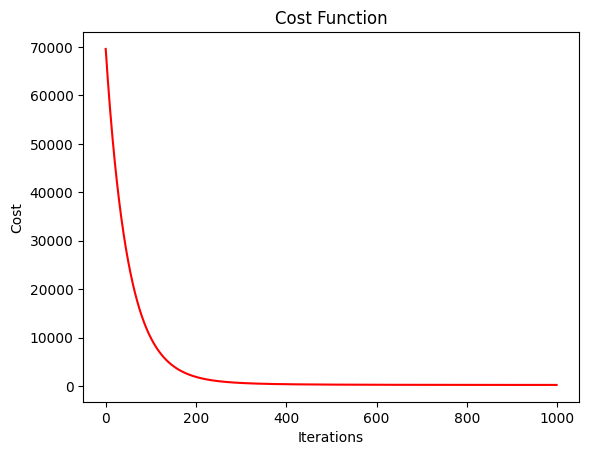

In [78]:
# Plotting the cost function
# visualizing gradient descent is converging
plt.plot(range(0, iterations + 1), cost_values, color="red")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function")
plt.show()

In [79]:
# First, normalize our example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - x_mu) / x_sigma

# Predict the price
x_house_predict = np.dot(x_house_norm, w) + b

# Access the scalar value of x_house_predict before formatting
print(f"Predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict[0] * 1000:0.0f}")


Predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $319779
